

> Aluno: Liander Vinicius Amorim de Souza

>Disciplina: Ciência de Dados


> Matrícula: 20223833486






# Importações


In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from scipy import stats

# Importações de pré-processamento e validação
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils.class_weight import compute_class_weight

# Importações para modelos e avaliação
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

# TensorFlow (para rede neural)
import tensorflow as tf
# Outras
from imblearn.over_sampling import SMOTE


In [66]:
df = pd.read_csv('Heart_failure_prediction.csv')

In [67]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Pré-processamento de Dados

In [68]:
# Remover todas as duplicatas
df_sem_duplicatas = df.drop_duplicates(keep=False)

In [69]:
# Transformação dos dados

def Convert_sex(df):
    df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'M' else 1 if x == 'F' else x)
    return df

def Convert_chestPainType(df):
    mapping = {'ATA': 0, 'NAP': 1, 'ASY': 3, 'TA': 4}
    df['ChestPainType'] = df['ChestPainType'].map(mapping).fillna(df['ChestPainType'])
    return df

def Convert_ST_Slope(df):
    mapping = {'Up': 0, 'Flat': 1, 'Down': 3}
    df['ST_Slope'] = df['ST_Slope'].map(mapping).fillna(df['ST_Slope'])
    return df

def Convert_restingECG(df):
    mapping = {'Normal': 0, 'ST': 1, 'LVH': 2}
    df['RestingECG'] = df['RestingECG'].map(mapping).fillna(df['RestingECG'])
    return df

def Convert_exerciseAngina(df):
    df['ExerciseAngina'] = df['ExerciseAngina'].apply(lambda x: 0 if x == 'N' else 1 if x == 'Y' else x)
    return df

# Aplicar as funções de conversão diretamente no DataFrame
df = Convert_sex(df)
df = Convert_chestPainType(df)
df = Convert_ST_Slope(df)
df = Convert_restingECG(df)
df = Convert_exerciseAngina(df)

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,4,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [70]:
# Tratando valores ausentes
df = df.fillna(df.mean())  # Substituindo valores ausentes pela média

# Estatísticas

In [71]:
import pandas as pd
import numpy as np
from scipy import stats

def is_numeric(column):
    "Verifica se a coluna é numérica."
    return pd.api.types.is_numeric_dtype(column)

def calculate_mean(column):
    "Calcula a média da coluna."
    return round(column.mean(), 2)

def calculate_median(column):
    "Calcula a mediana da coluna."
    return round(column.median(), 2)

def calculate_mode(column):
    "Calcula a moda da coluna."
    return list(np.round(column.mode().values, 2))

def calculate_weighted_mean(column):
    "Calcula a média ponderada, usando a posição dos elementos como pesos."
    return round(np.average(column, weights=range(len(column))), 2)

def calculate_trimmed_mean(column):
    "Calcula a média truncada, removendo 10% dos valores extremos."
    return round(stats.trim_mean(column, 0.1), 2)

def calculate_outliers(column, method='IQR'):
    "Calcula os outliers da coluna numérica usando diferentes métodos."
    if method == 'IQR':
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return list(np.round(outliers, 2)), len(outliers)
    elif method == 'z-score':
        z_scores = np.abs(stats.zscore(column))
        outliers = column[z_scores > 3]
        return list(np.round(outliers, 2)), len(outliers)
    else:
        return [], 0

def calculate_statistics(column, outlier_method='IQR'):
    "Calcula estatísticas descritivas para uma coluna numérica."
    if not is_numeric(column):
        return {
            "Tipo": "Não numérico",
            "Análise": "Estatísticas não aplicáveis"
        }

    column = column.dropna()  # Remove valores ausentes

    return {
        "Média": calculate_mean(column),
        "Mediana": calculate_median(column),
        "Moda": calculate_mode(column),
        "Média Ponderada": calculate_weighted_mean(column),
        "Média Truncada": calculate_trimmed_mean(column),
        "Outliers": calculate_outliers(column, outlier_method)[0],  # Lista de outliers
        "Qtd Outliers": calculate_outliers(column, outlier_method)[1]  # Quantidade de outliers
    }

def main(df, outlier_method='IQR'):
    "Calcula estatísticas para colunas numéricas de um DataFrame."
    resultados = {coluna: calculate_statistics(df[coluna], outlier_method)
                  for coluna in df.select_dtypes(include=[np.number]).columns}

    for coluna, stats in resultados.items():
        print(f"\nEstatísticas para {coluna}:")
        for metrica, valor in stats.items():
            print(f"{metrica}: {valor}")


main(df, outlier_method='z-score')


Estatísticas para Age:
Média: 53.51
Mediana: 54.0
Moda: [54]
Média Ponderada: 55.09
Média Truncada: 53.71
Outliers: []
Qtd Outliers: 0

Estatísticas para Sex:
Média: 0.21
Mediana: 0.0
Moda: [0]
Média Ponderada: 0.22
Média Truncada: 0.14
Outliers: []
Qtd Outliers: 0

Estatísticas para ChestPainType:
Média: 2.04
Mediana: 3.0
Moda: [3]
Média Ponderada: 2.13
Média Truncada: 2.11
Outliers: []
Qtd Outliers: 0

Estatísticas para RestingBP:
Média: 132.4
Mediana: 130.0
Moda: [120]
Média Ponderada: 132.63
Média Truncada: 131.5
Outliers: [190, 200, 200, 200, 0, 190, 200, 192]
Qtd Outliers: 8

Estatísticas para Cholesterol:
Média: 198.8
Mediana: 223.0
Moda: [0]
Média Ponderada: 205.83
Média Truncada: 204.41
Outliers: [529, 603, 564]
Qtd Outliers: 3

Estatísticas para FastingBS:
Média: 0.23
Mediana: 0.0
Moda: [0]
Média Ponderada: 0.24
Média Truncada: 0.17
Outliers: []
Qtd Outliers: 0

Estatísticas para RestingECG:
Média: 0.6
Mediana: 0.0
Moda: [0]
Média Ponderada: 0.78
Média Truncada: 0.51
Outlier

# Cálculos de estimativas de variabilidade

In [72]:
def calculate_variability(column):
    "Calcula métricas de variabilidade para uma coluna numérica."

    if not is_numeric(column):
        return {
            "Tipo": "Não numérico",
            "Análise": "Métricas de variabilidade não aplicáveis"
        }

    variance = column.var()
    std_dev = column.std()
    percentiles = {
        "Percentil 25%": column.quantile(0.25),
        "Mediana (Percentil 50%)": column.median(),
        "Percentil 75%": column.quantile(0.75)
    }

    return {
        "Variância": variance,
        "Desvio Padrão": std_dev,
        **percentiles  # Unindo o dicionário de percentis ao resultado
    }

def main(df):
    resultados = {coluna: calculate_variability(df[coluna])
                  for coluna in df.select_dtypes(include=[np.number]).columns}

    for coluna, stats in resultados.items():
        print(f"\nEstatísticas de variabilidade para {coluna}:")
        for metrica, valor in stats.items():
            print(f"{metrica}: {valor}")

main(df)


Estatísticas de variabilidade para Age:
Variância: 88.97425416307314
Desvio Padrão: 9.432616506732007
Percentil 25%: 47.0
Mediana (Percentil 50%): 54.0
Percentil 75%: 60.0

Estatísticas de variabilidade para Sex:
Variância: 0.16622000793531888
Desvio Padrão: 0.4077008804691485
Percentil 25%: 0.0
Mediana (Percentil 50%): 0.0
Percentil 75%: 0.0

Estatísticas de variabilidade para ChestPainType:
Variância: 1.7157504223063285
Desvio Padrão: 1.3098665666037623
Percentil 25%: 1.0
Mediana (Percentil 50%): 3.0
Percentil 75%: 3.0

Estatísticas de variabilidade para RestingBP:
Variância: 342.7739027756993
Desvio Padrão: 18.514154119907808
Percentil 25%: 120.0
Mediana (Percentil 50%): 130.0
Percentil 75%: 140.0

Estatísticas de variabilidade para Cholesterol:
Variância: 11964.891079417323
Desvio Padrão: 109.38414455220337
Percentil 25%: 173.25
Mediana (Percentil 50%): 223.0
Percentil 75%: 267.0

Estatísticas de variabilidade para FastingBS:
Variância: 0.17896760061106634
Desvio Padrão: 0.4230456

# histogramas dos atributos


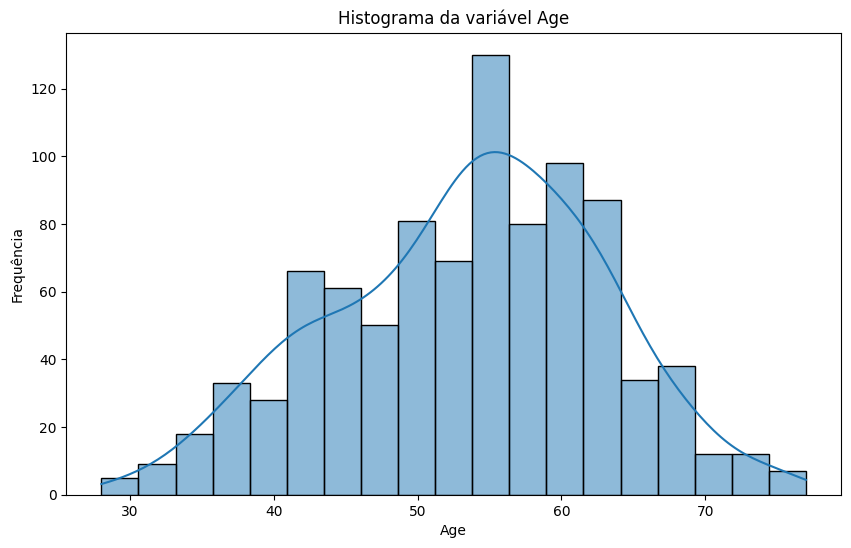

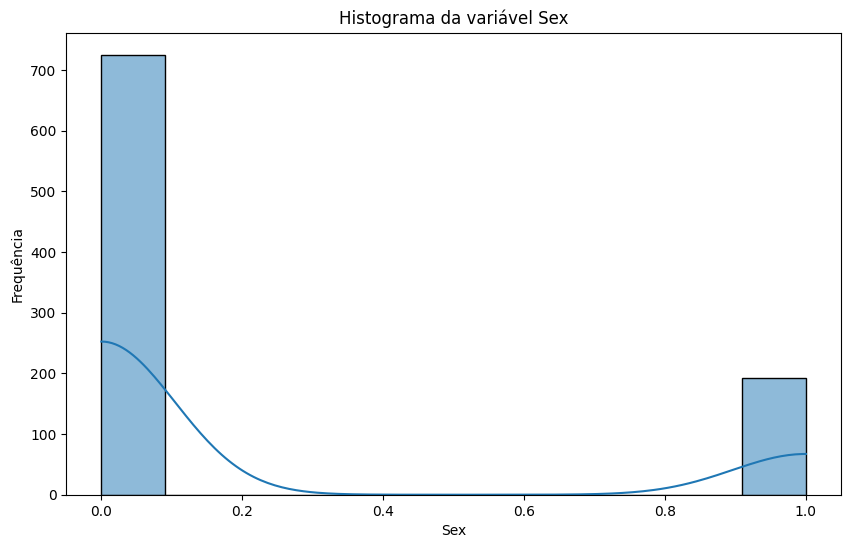

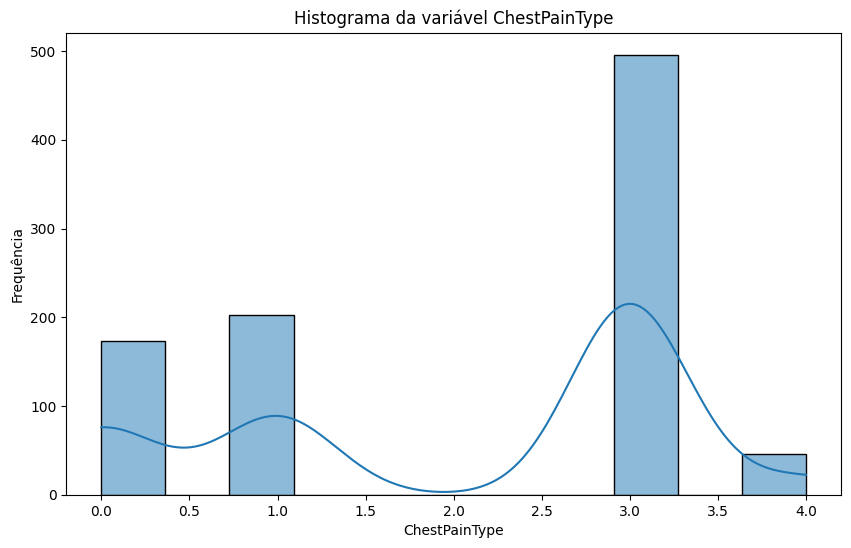

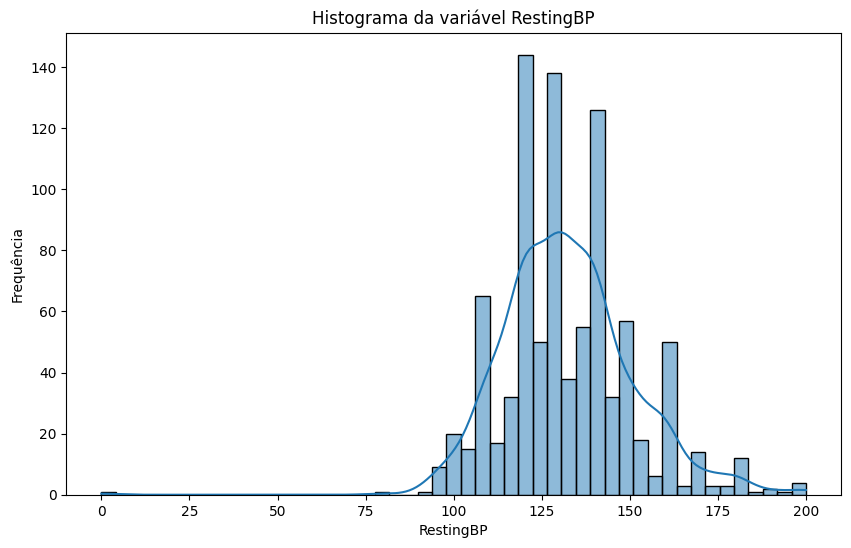

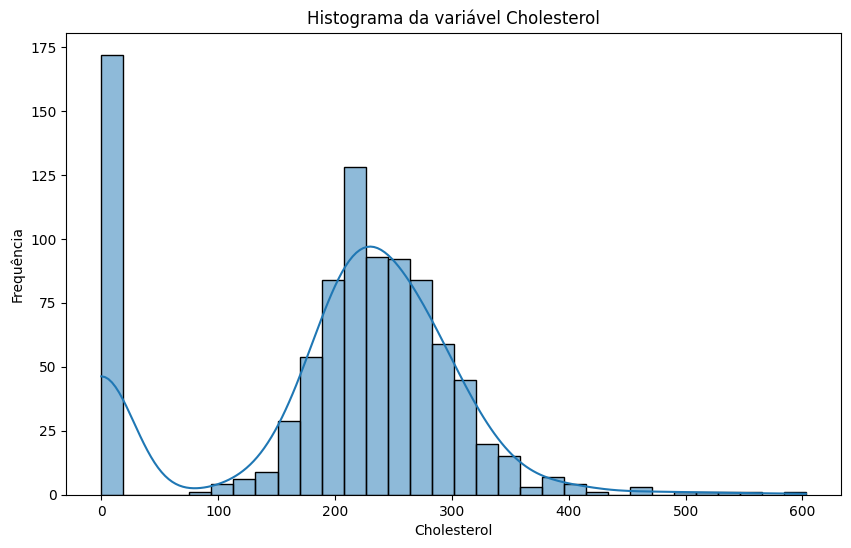

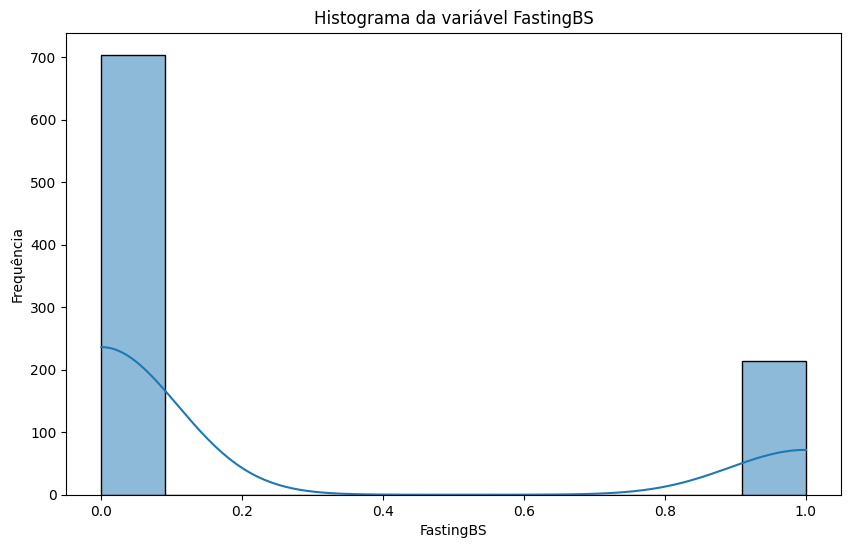

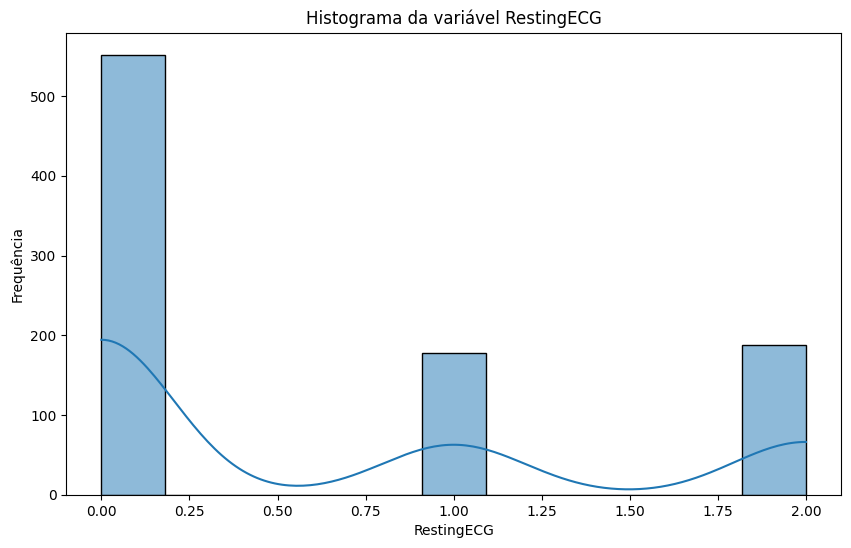

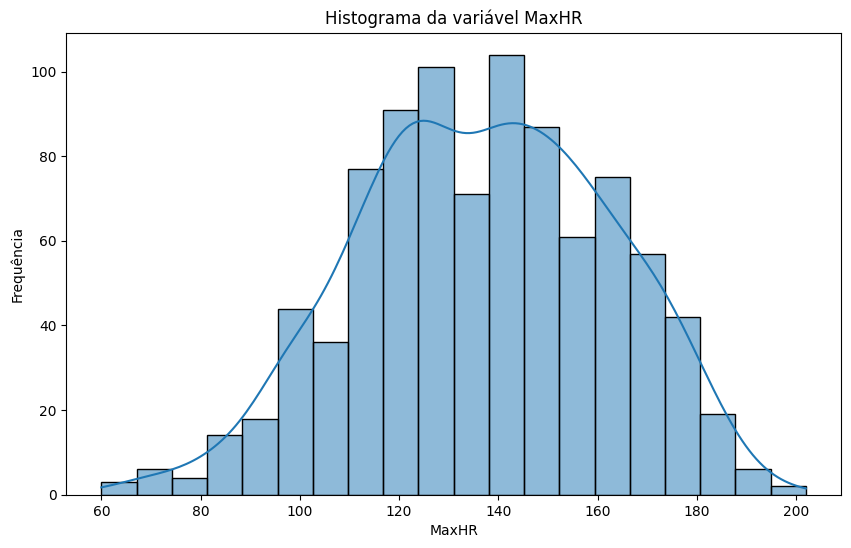

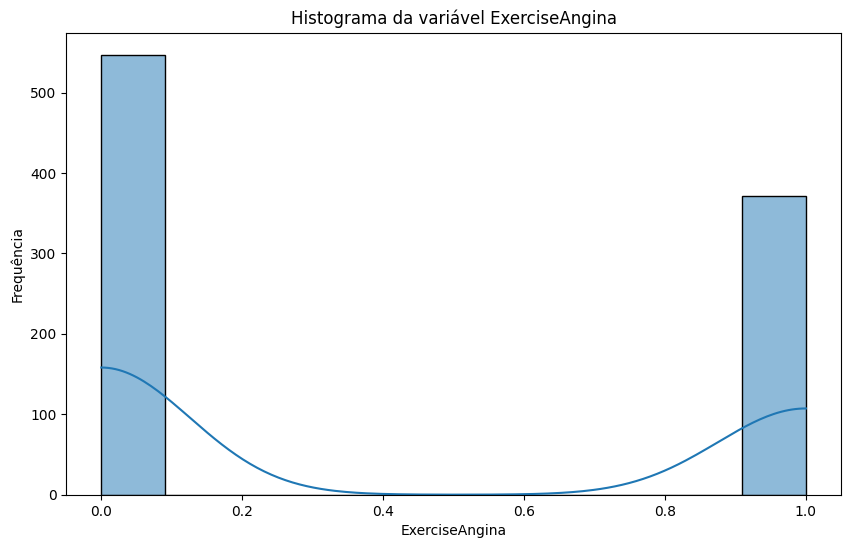

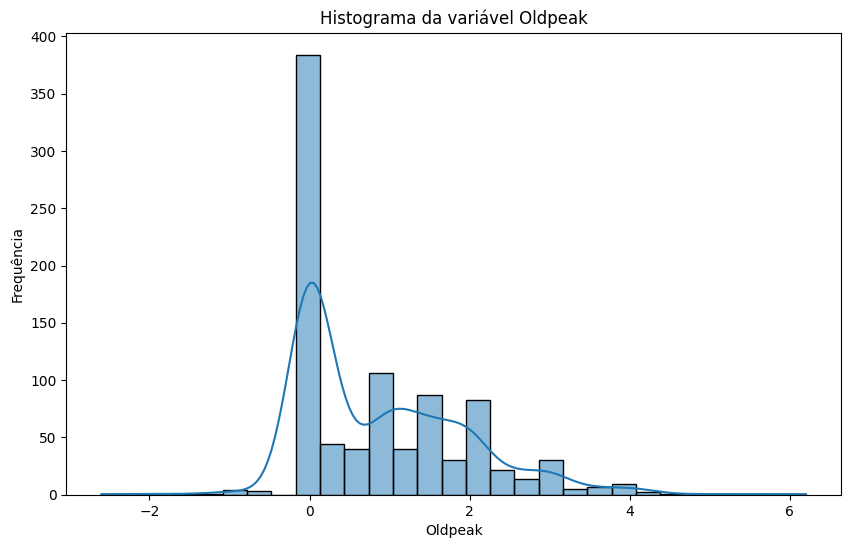

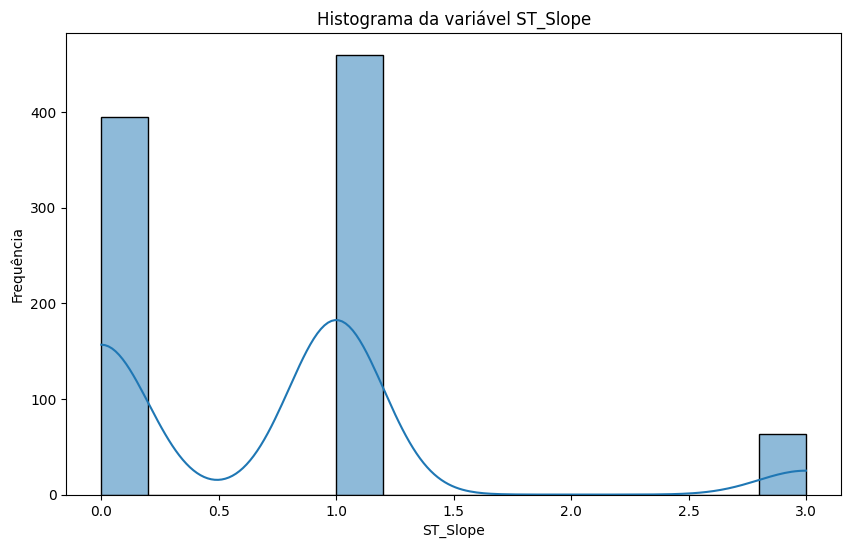

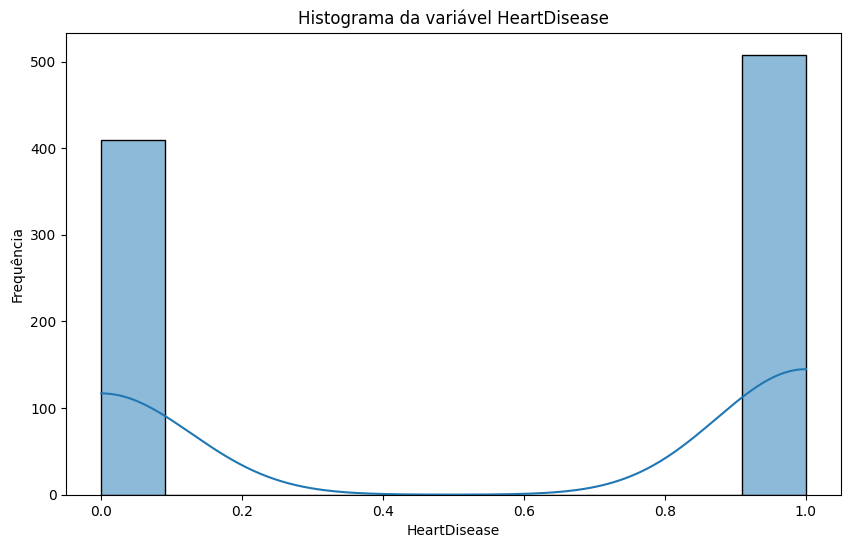

In [73]:
# Função para criar histogramas
def plot_histograms(df):
    for column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histograma da variável {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.show()

# Chamando a função para plotar os histogramas
plot_histograms(df)

# Normalização


In [74]:
from sklearn.preprocessing import MinMaxScaler

# Criando o normalizador
scaler = MinMaxScaler()

# Aplicando a normalização
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Dataset Original:")
print(df)
print("\nDataset Normalizado:")
print(df_normalized)

Dataset Original:
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              4        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpe

# Treinamneto

In [75]:
# Separando variáveis X e Y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Dividir o dataset em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Matriz de correlação - Matriz de correlação -Erro quadrático médio

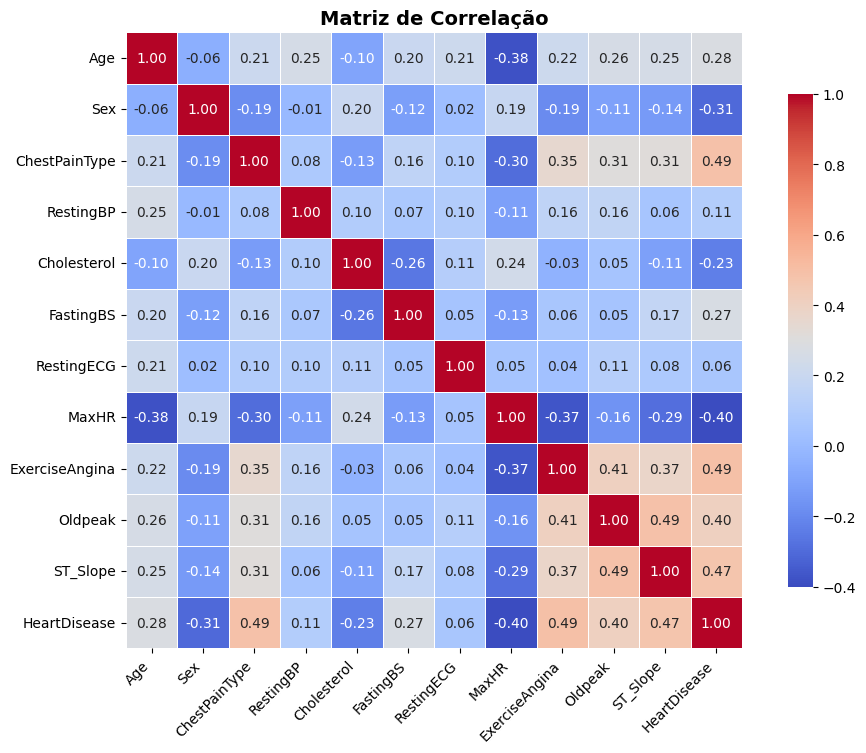

In [76]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))  # Aumenta o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, square=True, cbar_kws={'shrink': 0.8},
            annot_kws={"size": 10})  # Melhora a legibilidade das anotações
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotaciona os rótulos do eixo X
plt.yticks(fontsize=10)  # Ajusta o tamanho dos rótulos do eixo Y
plt.title("Matriz de Correlação", fontsize=14, fontweight='bold')  # Título destacado
plt.show()

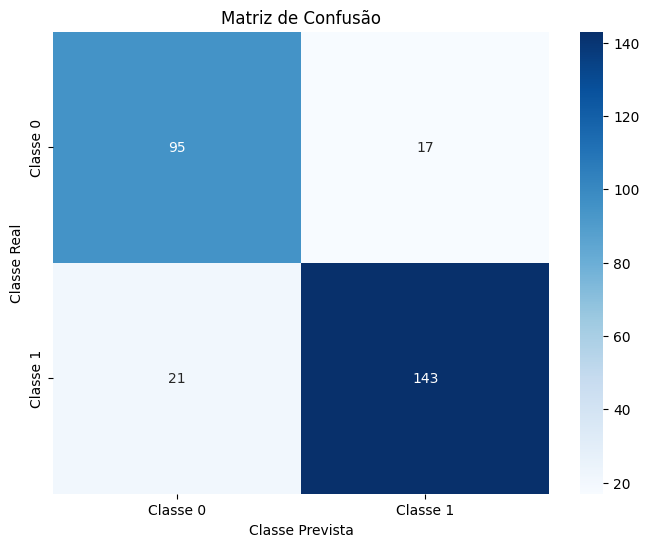

In [77]:
# Treinando um modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fazendo previsões sobre o conjunto de teste
y_pred = model.predict(X_test)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

In [78]:
# Calcular o erro quadrático médio (para regressão ou previsão contínua)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')

Erro Quadrático Médio (MSE): 0.14


# Arvore de Decisão

Tempo de processamento para o treinamento da Árvore de Decisão: 0.01 segundos


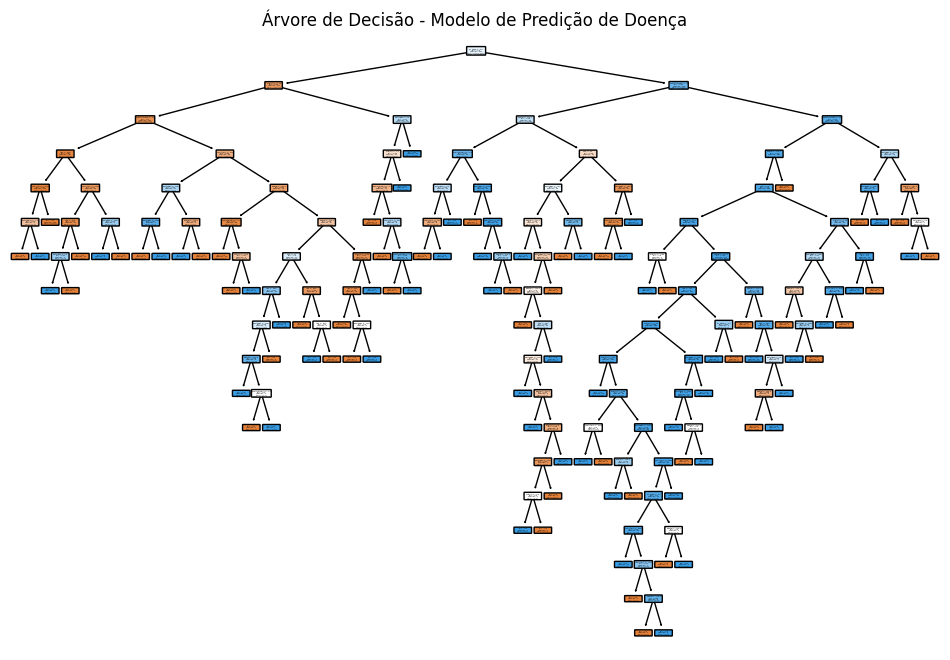

Tempo de processamento para a geração do gráfico: 3.68 segundos


In [79]:
import time

# Marcar o tempo de início para o treinamento do modelo
start_time = time.time()

# Treinando o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Calcular o tempo de processamento para o treinamento do modelo
end_time = time.time()
training_time = end_time - start_time
print(f"Tempo de processamento para o treinamento da Árvore de Decisão: {training_time:.2f} segundos")

# Marcar o tempo de início para a geração do gráfico da árvore
start_time_plot = time.time()

# Gerando o gráfico da árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Sem Doença', 'Com Doença'], rounded=True, proportion=False, precision=2)
plt.title("Árvore de Decisão - Modelo de Predição de Doença")
plt.show()

# Calcular o tempo de processamento para a geração do gráfico
end_time_plot = time.time()
plot_time = end_time_plot - start_time_plot
print(f"Tempo de processamento para a geração do gráfico: {plot_time:.2f} segundos")


In [80]:
# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo de Árvore de Decisão: {accuracy:.2f}")


Acurácia do modelo de Árvore de Decisão: 0.86


# Rede Neural

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


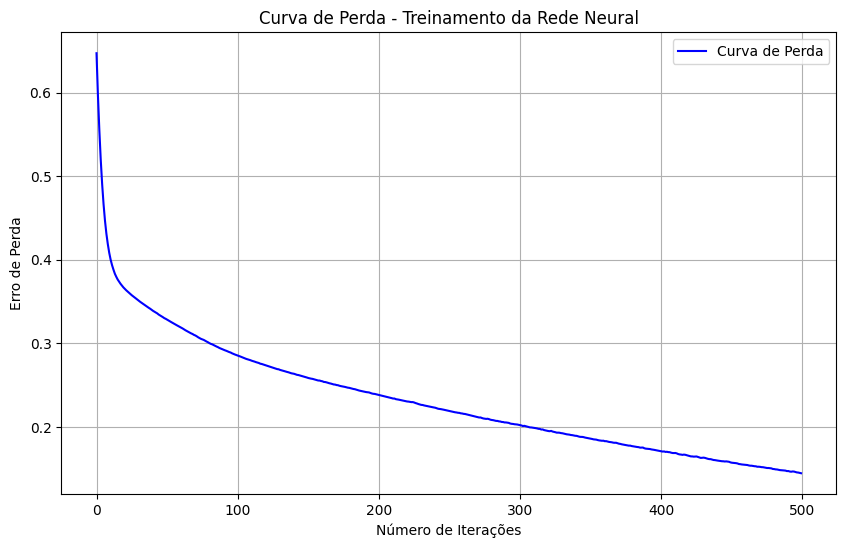

Tempo de processamento para a geração do gráfico da curva de perda: 0.20 segundos


In [81]:
# Marcar o tempo de início para o escalonamento dos dados
start_time_scaling = time.time()

# Escalonando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo MLP
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model_nn.fit(X_train_scaled, y_train)
y_pred_nn = model_nn.predict(X_test_scaled)

# Marcar o tempo de início para a geração do gráfico
start_time_plot = time.time()

# Plotando a curva de perda durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(model_nn.loss_curve_, label='Curva de Perda', color='blue')
plt.title("Curva de Perda - Treinamento da Rede Neural")
plt.xlabel("Número de Iterações")
plt.ylabel("Erro de Perda")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Calcular o tempo de processamento para a geração do gráfico
end_time_plot = time.time()
plot_time_nn = end_time_plot - start_time_plot
print(f"Tempo de processamento para a geração do gráfico da curva de perda: {plot_time_nn:.2f} segundos")

In [82]:
# Calculando a acurácia
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Acurácia do modelo de Rede Neural: {accuracy_nn:.2f}")

Acurácia do modelo de Rede Neural: 0.85


# Comparação dos modelos

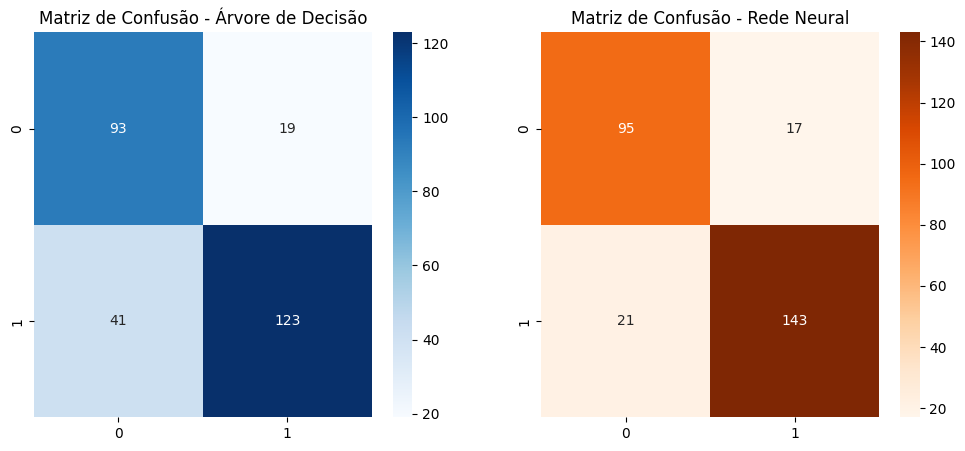

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


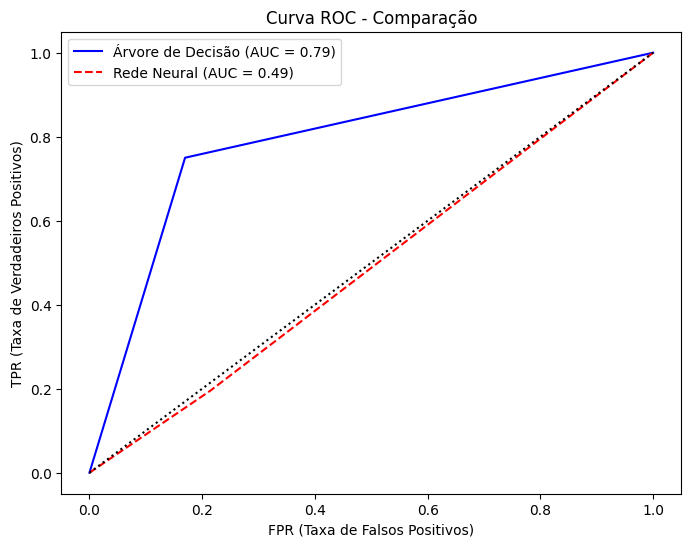

Métricas da Árvore de Decisão:
Precisão: 0.87
Recall: 0.75
F1-Score: 0.80

Métricas da Rede Neural:
Precisão: 0.57
Recall: 0.20
F1-Score: 0.29


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definição e treinamento do pipeline com Árvore de Decisão
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)

# 2️ Matriz de Confusão
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_tree = confusion_matrix(y_test, pipeline.predict(X_test))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Árvore de Decisão')

cm_nn = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Rede Neural')

plt.show()

# 3️ ROC Curve e AUC Score
# Calculando as probabilidades preditas para a Árvore de Decisão
y_pred_prob_tree = pipeline.predict_proba(X_test)[:, 1]

# Calculando as probabilidades preditas para a Rede Neural
y_pred_prob_nn = model.predict_proba(X_test_scaled)[:, 1]  # Usando o modelo MLP para prever probabilidades

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
auc_tree = auc(fpr_tree, tpr_tree)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Árvore de Decisão (AUC = {auc_tree:.2f})', color='blue')
plt.plot(fpr_nn, tpr_nn, label=f'Rede Neural (AUC = {auc_nn:.2f})', color='red', linestyle='dashed')
plt.plot([0, 1], [0, 1], linestyle='dotted', color='black')
plt.xlabel('FPR (Taxa de Falsos Positivos)')
plt.ylabel('TPR (Taxa de Verdadeiros Positivos)')
plt.title('Curva ROC - Comparação')
plt.legend()
plt.show()

# Cálculo das métricas para a Árvore de Decisão
y_pred_tree = pipeline.predict(X_test)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Exibindo as métricas da Árvore de Decisão
print("Métricas da Árvore de Decisão:")
print(f"Precisão: {precision_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"F1-Score: {f1_tree:.2f}")

# Cálculo das métricas para a Rede Neural
y_pred_nn = model.predict(X_test_scaled)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

# Exibindo as métricas da Rede Neural
print("\nMétricas da Rede Neural:")
print(f"Precisão: {precision_nn:.2f}")
print(f"Recall: {recall_nn:.2f}")
print(f"F1-Score: {f1_nn:.2f}")
